In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import shutil
import re
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-05-20 12:31:31.493563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 12:31:31.493650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 12:31:31.586385: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 

## 1.C)

In [2]:
import os

# Check if the environment variable KAGGLE_KERNEL_RUN_TYPE is set
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    current_path = Path("/kaggle/input/dog-cats-images")
    data_path = current_path/"experiment_small_data"
    
else:
    current_path= Path().absolute()         # current path

test_path= current_path/"test"/"test"   # path to the test data
train_path= current_path/"train"/"train"    # path to train data

In [3]:
train_path

PosixPath('/kaggle/input/dog-cats-images/train/train')

In [4]:
original_data_path= current_path/ "original_data"   # original data folder path
original_data_path.mkdir(exist_ok=True)             # making the folder

In [5]:
if test_path.exists():  # if the folders exist in test test, then move it to original
    shutil.move(test_path, original_data_path)
if train_path.exists():
    shutil.move(train_path, original_data_path)

In [6]:
experimental_small= current_path/"experiment_small_data"
experimental_small.mkdir(exist_ok=True)

experimental_small_train= experimental_small/"train"
experimental_small_train.mkdir(exist_ok=True)

experimental_small_test= experimental_small/"test"
experimental_small_test.mkdir(exist_ok=True)

experimental_small_val= experimental_small/"val"
experimental_small_val.mkdir(exist_ok=True)

In [7]:
folders_delete = [  # list of folders to delete
    current_path / "test",
    current_path / "train",
]

for folder in folders_delete:   # delete folder if it exists
    if folder.exists():
        shutil.rmtree(folder)

In [8]:
experimental_small_train

PosixPath('/kaggle/input/dog-cats-images/experiment_small_data/train')

## 1.A/B)

In [9]:
original_data= current_path/"original_data" # path original data
test_data_path= original_data/"test" # new test data
train_data_path= original_data/"train"   # new train data

In [10]:
train_data_path

PosixPath('/kaggle/input/dog-cats-images/original_data/train')

In [11]:
train_list= list(train_data_path.iterdir())  # list of the image train paths
test_list= list(test_data_path.iterdir())  # list of the image test paths

In [12]:
pictures= np.random.choice(train_list, 10)  # ten random paths
pattern = r"\b\w{3}\b"  # pattern for dog or cat
labels = [re.findall(pattern, path.name)[0] for path in pictures]   # regx to find pattern in the file name of the path 0 to take name and not jpg (first match)

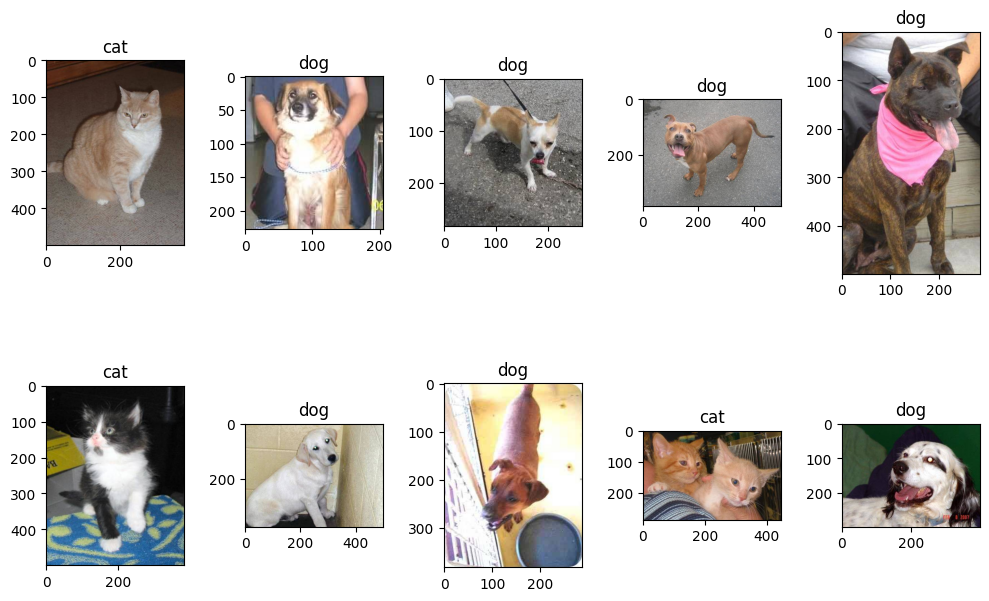

In [13]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image_path= train_data_path/f"{pictures[i]}"   # image math for the current number in the list
    image= plt.imread(image_path)       # reads as image
    ax.imshow(image)                    # showing image
    ax.set_title(labels[i])
    
fig.tight_layout()  

## 1.D)

In [14]:
def dogs_cats(train_test_val:list, animal_needed:int):
    
    total_dogs= [dog for dog in train_test_val if "dog" in dog.name]   # picking out all dogs
    np.random.shuffle(total_dogs)   # shuffle

    dogs= total_dogs[:animal_needed]    # picking number of dogs we need
    
    
    """Same thins for cats"""
    total_cats= [cat for cat in train_test_val if "cat" in cat.name]
    np.random.shuffle(total_cats)

    cats= total_cats[:animal_needed]
    
    for dog, cat in zip(dogs, cats):    # remove selected paths
        total_dogs.remove(dog)
        total_cats.remove(cat)
        
    updated_list = [animal for animal in train_test_val if animal not in dogs and animal not in cats] # updated list with non of the selected antimals to return
        
    total_data= []
    for dog, cat in zip(dogs, cats):    # list of the data set that you requested
        total_data.append(dog)
        total_data.append(cat)
    return total_data, updated_list

In [15]:
train_data_small, train_list= dogs_cats(train_list, 800)
test_data_small, train_list= dogs_cats(train_list, 250)
val_data_small, train_list= dogs_cats(train_list, 200)

print(f"train: {len(train_data_small)}\ntest: {len(test_data_small)}")

train: 1600
test: 500


In [16]:
import os

def move_list_to_folder(data_path, data_set):
    empty= any(os.scandir(data_path))   # checks if folder is empty and gives empty true or false
    
    """Checks if it is empty. If it is it adds the paths to the folder, if it's not empty, it prints a message"""
    if not empty:
        for path in data_set:
            shutil.move(path, data_path)
    else:
        print("This directory is not empty.")

In [17]:
move_list_to_folder(experimental_small_train, train_data_small)
move_list_to_folder(experimental_small_test, test_data_small)
move_list_to_folder(experimental_small_val, val_data_small)

This directory is not empty.
This directory is not empty.
This directory is not empty.


## 1.E)

In [18]:
experimental_small_train

PosixPath('/kaggle/input/dog-cats-images/experiment_small_data/train')

In [19]:
train_list= list(experimental_small_train.iterdir())    # lsit of the paths
test_list= list(experimental_small_test.iterdir())    # lsit of the paths
val_list= list(experimental_small_val.iterdir())    # lsit of the paths

In [20]:
def label_data(data):
    """Labels the lists with 1 or 0 for dog and cat"""
    labels= []
    images= []
    np.random.shuffle(data)   #shuffel to see random images
    for path in data:    # setting labels 1 for dog, 0 for cat
        label= 1 if "dog" in path.name else 0
        labels.append(label)
        
        image= cv2.imread(str(path))
        images.append(image)
        
    return images, np.array(labels)


In [21]:
X_train, y_train= label_data(train_list)
X_test, y_test= label_data(test_list)
X_val, y_val= label_data(val_list)

In [22]:
"""Plotting to see if labels were correctly added"""
def plot_image(images, labels):
    fig, axes= plt.subplots(2, 5, figsize= (12, 6))
    
    for i, ax in enumerate(axes.flatten()):
        
        ax.imshow(images[i])    # plotting the image
        ax.set_title(labels[i])  # and setting the title

    fig.tight_layout()

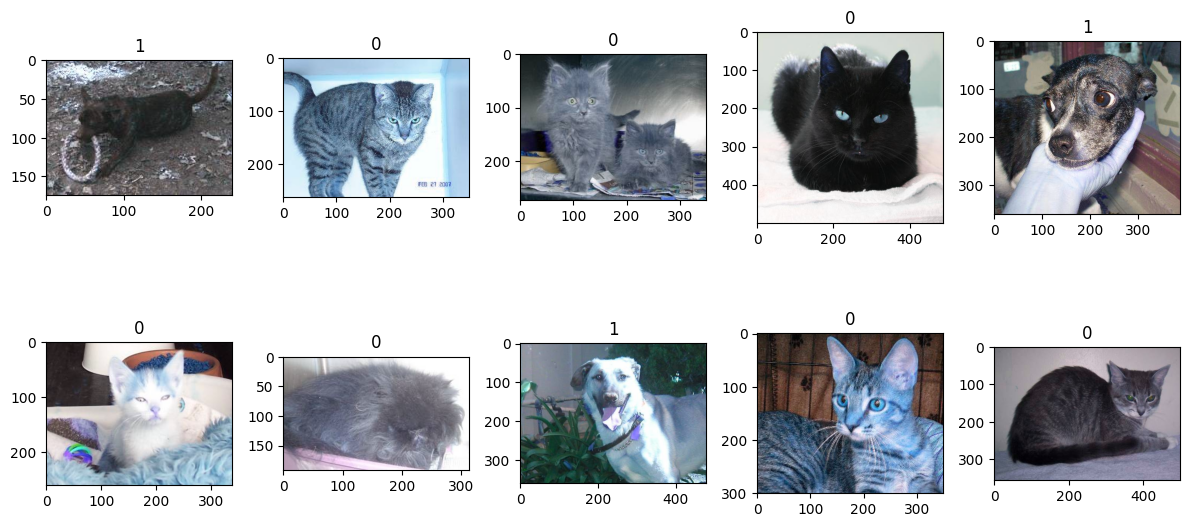

In [23]:
plot_image(X_train, y_train)

In [24]:
def plot(images, labels):
    """From list to df for plotting"""

    df = pd.DataFrame(
        {
            "image": images,
            "label": labels
        }
    )
    df["count"] = df["label"].sum()
    sns.barplot(data=df, x="label", y="count")

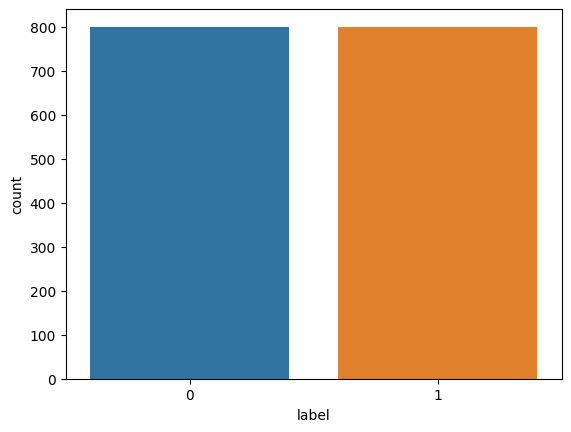

In [25]:
plot(X_train, y_train)

## 2.A)

In [26]:
def image_sizes(data):
    """Gives list of the image sizes"""
    image_sizes= []
    
    for image in data:
        image_size= image.shape[:2]
        image_sizes.append(image_size)
        
    return image_sizes

In [27]:
train_sizes= image_sizes(X_train)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


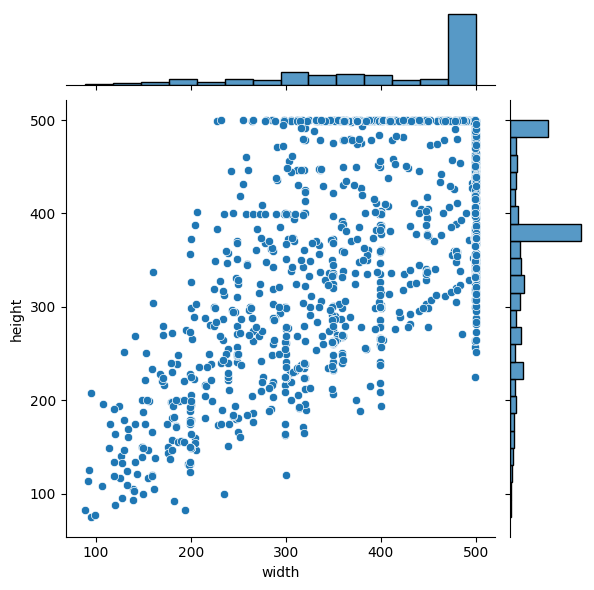

In [28]:
df_train_sizes= pd.DataFrame(data= train_sizes, columns= ["height", "width"])
"""Scatter for every image, width and height also has a histogram"""
sns.jointplot(data= df_train_sizes, x= "width", y= "height")

## 2.B) testing later if i need to change


## 2.C)

In [29]:
def resize(data, size= (180, 200)):
    """reads in image and resize, returns in a numpy array"""
    resized_images= []
    for image in data:
        
        resized_image= cv2.resize(image, size)
        resized_images.append(resized_image)
        
    return np.array(resized_images)

In [30]:
X_train= resize(X_train)
X_test= resize(X_test)
X_val= resize(X_val)

In [31]:
X_train.shape

(1600, 200, 180, 3)

## 2.D)

## 3.A)

In [32]:
X_train.shape[1:]

(200, 180, 3)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam


def cnn_model(learning_rate=0.001, dropout_rate=0.3, kernels=[32, 64, 128, 256]):
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    for kernel in kernels:
        conv_layer = Conv2D(
            kernel,
            kernel_size= (3, 3),
            activation= "relu",
            kernel_initializer= "he_normal",
            input_shape= X_train.shape[1:],
        )
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size= [2,2], strides= 2))
        
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation= "relu"))
    
    model.add(Dense(1, activation= "sigmoid"))
    model.compile(loss= 'binary_crossentropy', optimizer= adam, metrics= ['accuracy'])
    
    return model

In [34]:
model= cnn_model()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 9, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,796,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,185,921 (46.49 MB)

 Trainable params: 12,185,921 (46.49 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
"""Scaling the data by dividing by 255 whisc is the max number in rgb"""
scaled_X_train= X_train.astype("float32")/ 255
scaled_X_test= X_test.astype("float32")/ 255
scaled_X_val= X_val.astype("float32")/ 255

scaled_X_train.flatten().min(), scaled_X_train.flatten().max()

(0.0, 1.0)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
"""Making a early stopper that stops if 10 epochs dont give better result based om val accuracy"""
early_stopper = EarlyStopping(monitor= "val_acc", mode= "max", patience= 10, restore_best_weights= True)

In [37]:
"""Training the model on the scaled data"""
model.fit(
    scaled_X_train,
    y_train,
    epochs= 50,
    callbacks= [early_stopper],
    validation_data= (scaled_X_val, y_val),
)

Epoch 1/50
 3/50 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5017 - loss: 10.1545

I0000 00:00:1716208370.962629     111 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716208370.981735     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5118 - loss: 3.2986

W0000 00:00:1716208373.785389     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.5120 - loss: 3.2259 - val_accuracy: 0.5000 - val_loss: 0.7587
Epoch 2/50
 3/50 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5833 - loss: 0.6824

W0000 00:00:1716208375.569393     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5271 - loss: 0.6893 - val_accuracy: 0.5250 - val_loss: 0.6871
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5530 - loss: 0.6852 - val_accuracy: 0.5125 - val_loss: 0.6907
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5617 - loss: 0.6778 - val_accuracy: 0.6200 - val_loss: 0.6427
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6563 - loss: 0.6211 - val_accuracy: 0.6450 - val_loss: 0.6322
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6864 - loss: 0.5741 - val_accuracy: 0.6975 - val_loss: 0.5935
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7545 - loss: 0.5242 - val_accuracy: 0.7100 - val_loss: 0.6318
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7758 - loss: 0.4514 - val_accuracy: 0.6725 - val_loss: 0.6551
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8232 - loss: 0.3918 - val_accuracy: 0.7100 - val_loss: 0.

In [38]:
"""history history to get the history dict from the model. Which is the metrics of the training"""
metrics= pd.DataFrame(model.history.history)

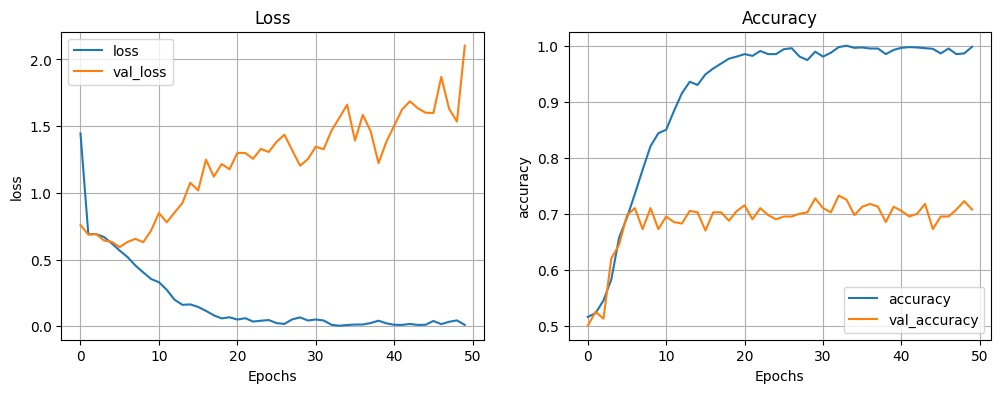

In [39]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel= "Epochs", ylabel= "loss")
    metrics[["accuracy", "val_accuracy"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel= "Epochs", ylabel= "accuracy")

plot_metrics(metrics)   # Sign of overfitting probably due to to little data

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [71]:
print(classification_report(y_val, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [41]:
y_pred= model.predict(scaled_X_val)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [42]:
y_test.dtype, (y_pred > .5)[:5]

(dtype('int64'),
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

In [43]:
cm= confusion_matrix(y_val, y_pred > .5)
cm

array([[113,  87],
       [ 30, 170]])

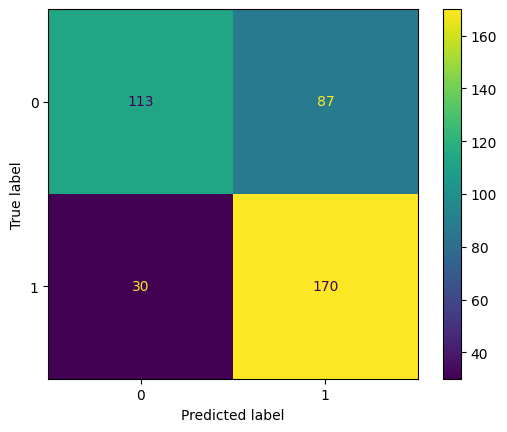

In [44]:
ConfusionMatrixDisplay(cm).plot()

In [45]:
print(classification_report(y_val, y_pred > .5))

              precision    recall  f1-score   support

           0       0.79      0.56      0.66       200
           1       0.66      0.85      0.74       200

    accuracy                           0.71       400
   macro avg       0.73      0.71      0.70       400
weighted avg       0.73      0.71      0.70       400



In [46]:
model_2= cnn_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [47]:
"""Modifying when testing"""
"""The settings for the augmentation testing around a little to learn how it affects"""
train_image_generator = ImageDataGenerator(
    rotation_range=5,  # rotaiting the image
    shear_range=0.1,    # changing angle slightly
    zoom_range=0.1,     # zoom variation
    horizontal_flip=True,  # no horizontal mirroring
    height_shift_range=0.2, # moves picture up and down
    width_shift_range=0.2,  # moves picture left and right
)

In [48]:
scaled_X_train= np.transpose(scaled_X_train, (0, 2, 1, 3))
scaled_X_val= np.transpose(scaled_X_val, (0, 2, 1, 3))


In [49]:
test_image_generator = ImageDataGenerator()
"""Instanciating the augmentation with flow"""
train_generator = train_image_generator.flow(scaled_X_train, y_train, batch_size= 32)
val_generator = test_image_generator.flow(scaled_X_val, y_val, batch_size= 32)

steps_per_epochs= len(X_train)// 32// 2 # Making the batch size for steps per epochs
validation_steps= len(X_val)// 32// 2 # Batch size for validationsteps, needs to be the "same size" / same division as the steps per epoch
steps_per_epochs, validation_steps

(25, 6)

In [50]:
model_2.fit(
    train_generator,
    steps_per_epoch= steps_per_epochs,
    epochs=100,
    callbacks=[early_stopper],
    validation_data= val_generator, # whis will give us batches for validation
    validation_steps= validation_steps,
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5469 - loss: 5.5570 

W0000 00:00:1716208490.063239     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 271ms/step - accuracy: 0.4973 - loss: 2.9845 - val_accuracy: 0.5365 - val_loss: 0.6949
Epoch 2/100
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4375 - loss: 0.7309

W0000 00:00:1716208496.479494     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.5178 - loss: 0.6973 - val_accuracy: 0.4792 - val_loss: 0.7757
Epoch 3/100


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7647
Epoch 4/100


W0000 00:00:1716208502.331512     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 235ms/step - accuracy: 0.5223 - loss: 0.7042 - val_accuracy: 0.4688 - val_loss: 0.7090
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.4675 - loss: 0.6956 - val_accuracy: 0.4583 - val_loss: 0.7010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3125 - val_loss: 0.7289
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step - accuracy: 0.5267 - loss: 0.6897 - val_accuracy: 0.5521 - val_loss: 0.6911
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.5759 - loss: 0.6910 - val_accuracy: 0.5885 - val_loss: 0.6863
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 0.6767
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - accuracy: 0.5527 - loss: 0.7211 - val_accuracy: 0.5052 - val_loss: 0.6932
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.5139 - loss: 0.6954 - va

In [51]:
y_pred= model_2.predict(scaled_X_val)
y_pred[:5]

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


array([[0.9278158 ],
       [0.79105496],
       [0.46499538],
       [0.47390646],
       [0.6094446 ]], dtype=float32)

In [52]:
cm= confusion_matrix(y_val, y_pred > .5)

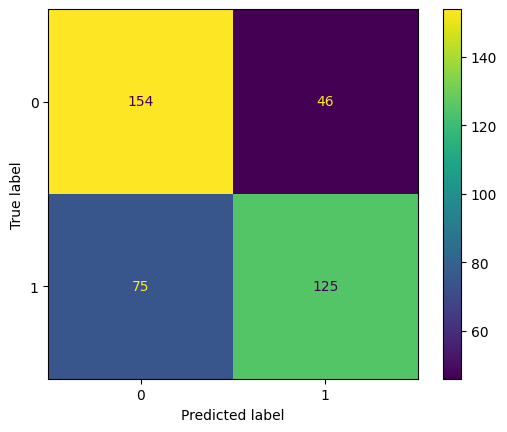

In [53]:
ConfusionMatrixDisplay(cm).plot()

In [70]:
metrics_2= pd.DataFrame(model_2.history.history)
metrics_2

""


### Can't plot metrics due to the history is empty.

In [54]:
from tensorflow.keras.applications import Xception

feature_extractor= Xception(weights= "imagenet", include_top= False, input_shape= (180, 200, 3))

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [55]:
from tensorflow.keras.layers import GlobalAveragePooling2D

input_shape = (180, 200, 3)


def xception_model(learning_rate=0.001, dropout_rate=0.3):
    
    feature_extractor = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(
        [
            feature_extractor,
            GlobalAveragePooling2D(),
            Dropout(.3),
            Dense(512, activation= "relu", kernel_initializer= "he_normal"),
            Dropout(dropout_rate), 
            Dense(1, activation= "sigmoid"),
        ]
    )

    for layer in feature_extractor.layers:
        layer.trainable= False

    model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
    
    return model

xception_model_1= xception_model()
model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 9, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,796,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,557,765 (139.46 MB)

 Trainable params: 12,185,921 (46.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,371,844 (92.97 MB)

In [56]:
print("scaled_X_train shape:", scaled_X_train.shape)
print("scaled_X_val shape:", scaled_X_val.shape)

scaled_X_train shape: (1600, 180, 200, 3)
scaled_X_val shape: (400, 180, 200, 3)


In [57]:
xception_model_1.fit(
    scaled_X_train,
    y_train,
    epochs= 50,
    callbacks= [early_stopper],
    validation_data= (scaled_X_val, y_val),
)

Epoch 1/50
 1/50 ━━━━━━━━━━━━━━━━━━━━ 15:34 19s/step - accuracy: 0.4062 - loss: 0.7738

W0000 00:00:1716208920.479435     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7577 - loss: 0.4527

W0000 00:00:1716208928.451953     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 320ms/step - accuracy: 0.7592 - loss: 0.4507 - val_accuracy: 0.8550 - val_loss: 0.3603
Epoch 2/50
 1/50 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.8125 - loss: 0.5377

W0000 00:00:1716208936.227520     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8870 - loss: 0.2506 - val_accuracy: 0.8525 - val_loss: 0.3235
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9042 - loss: 0.2119 - val_accuracy: 0.8875 - val_loss: 0.2786
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9146 - loss: 0.1837 - val_accuracy: 0.8900 - val_loss: 0.2882
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9451 - loss: 0.1404 - val_accuracy: 0.8900 - val_loss: 0.3088
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9493 - loss: 0.1289 - val_accuracy: 0.8875 - val_loss: 0.3059
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9563 - loss: 0.1054 - val_accuracy: 0.8800 - val_loss: 0.3215
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9609 - loss: 0.0924 - val_accuracy: 0.8875 - val_loss: 0.3351
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9666 - loss: 0.0843 - val_accuracy: 0.8800 - val_

 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

W0000 00:00:1716209194.654681     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step


W0000 00:00:1716209198.317863     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


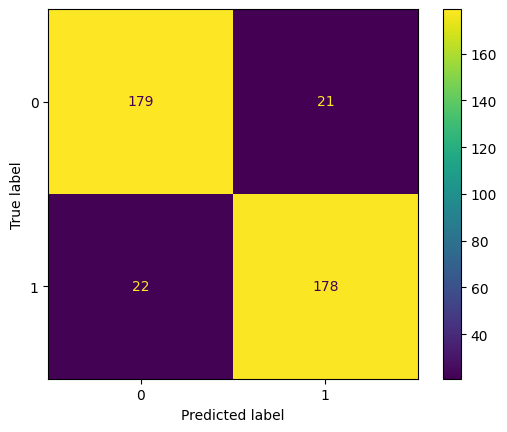

In [58]:
y_pred= xception_model_1.predict(scaled_X_val)
y_pred[:5]
cm= confusion_matrix(y_val, y_pred > .5)
ConfusionMatrixDisplay(cm).plot()

In [59]:
xception_model_2= xception_model()

In [60]:
xception_model_2.fit(
    train_generator,
    steps_per_epoch= steps_per_epochs,
    epochs=100,
    callbacks=[early_stopper],
    validation_data= val_generator, # whis will give us batches for validation
    validation_steps= validation_steps,
)

Epoch 1/100
 2/25 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5078 - loss: 1.0459 

W0000 00:00:1716209211.925589     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.6320 - loss: 0.8227

W0000 00:00:1716209220.331518     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 368ms/step - accuracy: 0.6356 - loss: 0.8141 - val_accuracy: 0.8438 - val_loss: 0.3760
Epoch 2/100
 2/25 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.8516 - loss: 0.3379

/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.8503 - loss: 0.3423 - val_accuracy: 0.8958 - val_loss: 0.2600
Epoch 3/100


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.4868
Epoch 4/100


W0000 00:00:1716209227.253174     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.8663 - loss: 0.2829 - val_accuracy: 0.8594 - val_loss: 0.3381
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.8706 - loss: 0.2997 - val_accuracy: 0.8490 - val_loss: 0.3385
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.5179
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.8830 - loss: 0.2741 - val_accuracy: 0.9010 - val_loss: 0.2907
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - accuracy: 0.8906 - loss: 0.2716 - val_accuracy: 0.8698 - val_loss: 0.3158
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4324
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.8766 - loss: 0.2784 - val_accuracy: 0.8646 - val_loss: 0.2879
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.8676 - loss: 0.3057 - val_ac

 2/13 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step

W0000 00:00:1716209650.078721     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 294ms/step


W0000 00:00:1716209653.602219     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


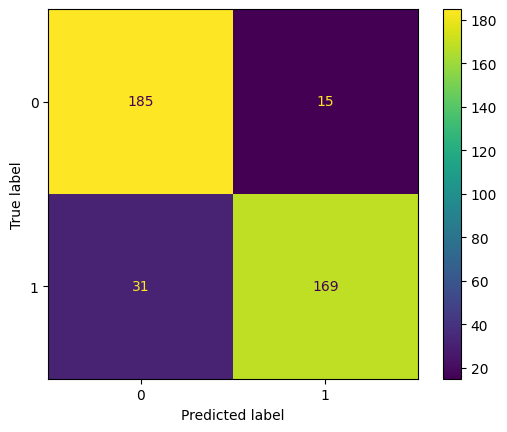

In [61]:
y_pred= xception_model_2.predict(scaled_X_val)
y_pred[:5]
cm= confusion_matrix(y_val, y_pred > .5)
ConfusionMatrixDisplay(cm).plot()